In [12]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline


#Lemons are sour, sweetness will be low, they have some low value for color
# Red values is higher, Yellow Lower
# Sweetness is higher, Sourness Lower

mean_01 = np.array([3.0,4.0])

#2 X 2 matrix
cov_01 = np.array([[1.0,-0.5],[-0.5,1.0]])

mean_02 = np.array([0.0,0.0])

cov_02 = np.array([[1.0,.5],[0.5,0.6]])

dist_01 = np.random.multivariate_normal(mean_01,cov_01,200) #200 is the no of points
dist_02 = np.random.multivariate_normal(mean_02,cov_02,200)

print (dist_01.shape)
print (dist_02.shape)
# print (dist_01)

(200, 2)
(200, 2)


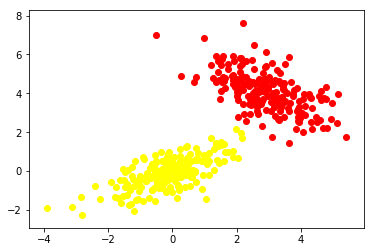

In [6]:
# Making a plot of these points
plt.figure(0)

for x in range(dist_01.shape[0]): # x will go from 0 till 199
    plt.scatter(dist_01[x,0],dist_01[x,1],color='red') # for all rows, value of x is 0th col,val of y is 1st col
    plt.scatter(dist_02[x,0],dist_02[x,1],color='yellow')
   
plt.show()

In [15]:
# Training Data Preparation

# 400 samples - 200 lemons, 200 apples

labels = np.zeros((400,1))
labels[200:] = 1.0

X_data = np.zeros((400,2))
X_data[:200, :] = dist_01 # row from startin to 200, and for all col 
X_data[200: , :] = dist_02


In [18]:
#KNN ALGO, complexity is O(Q.N) Q is number of query points. KNN is accurate but slow

def dist(x1,x2):
    return np.sqrt(((x1-x2)**2).sum())

def knn(X_train,query_point,y_train,k=5): #y_train is the label, k should not be too high or too low, it should also be odd
    vals = []
    
    for ix in range(X_train.shape[0]):  # form 0 to 399
        v = [ dist(query_point,X_train[ix,:]), y_train[ix]]
        vals.append(v)
    # vals is a list containing distances and their labels
      
    updated_vals = sorted(vals)
    # Lets us pick up top K values
    pred_arr = np.asarray(updated_vals[:k])
    
    pred_arr = np.unique(pred_arr[:,1],return_counts = True) #for every value in first col. 1st col contains label so we count their frequency
    #Largest Occurence 
    index = pred_arr[1].argmax() #Index of largest freq checking in 1st col  
    return pred_arr[0][index]

q = np.array([0.0,4.0])

predicted_label  = knn(X_data,q,labels)
print (predicted_label)




[0.]


In [24]:
#splitting the data into training and testing
split = int(X_data.shape[0] * 0.75) # shape tells size of matrix

X_train = X_data[:split]
X_test = X_data[split:]

y_train = labels[:split]
y_test = labels[split:]

print (X_train.shape, X_test.shape)
print (y_train.shape, y_test.shape)


(300, 2) (100, 2)
(300, 1) (100, 1)


In [25]:
#create a placeholder for storing test predictions
preds = []

#run a loop over every testing example and store predictions

for tx in range(X_test.shape[0]):
    preds.append(knn(X_train,X_test[tx],y_train))
preds = np.asarray(preds).reshape((250,1))
print (preds.shape)

(100, 1)


In [29]:
#(preds == y_test) # jaha jaha true hai, vaha true, else false 
(preds == y_test).sum()

99

In [32]:
# Accuracy
print (((preds == y_test).sum() / float(preds.shape[0]))*100)

99.0
